Use adafruit MQTT as described in https://www.hackster.io/robin-cole/micropython-leak-detector-with-adafruit-and-home-assistant-a2fa9e

Note that you don't use your password that you use to login to the web service, you use an `aio_key` to authenticate
* Host: io.adafruit.com
* Port: 1883 or 8883 (for SSL encrypted connection)
* Username: your Adafruit account username (see the accounts.adafruit.com page here to find yours)
* Password: your Adafruit IO key (click the AIO Key button on a dashboard to find the key)

Fetch credentials from json

In [13]:
import json
import paho.mqtt.client as mqtt
import paho.mqtt.publish as publish 
import time
import os

### MQTT 
broker = "io.adafruit.com"
port = 1883

In [14]:
# for loading credentials    
def load_creds(filename):
    try:
        with open(filename, 'r') as fp:
            data = json.load(fp)
            username = data['username']
            aio_key = data['aio_key']
            return username, aio_key
    except Exception as e:
        print(e)

In [15]:
filename = '/Users/robincole/Desktop/adafruit_io_creds.json'
username, aio_key = load_creds(filename)

Topic on adafruit includes your username

In [9]:
topic = f"{username}/feeds/wipy-temperature"

In [17]:
# Reqired callbacks
def on_connect(client, userdata, flags, rc):
    print(f"CONNACK received with code {rc}")
    if rc==0:
        print("connected OK")
    else:
        print("Bad connection Returned code=",rc)

def on_publish(client, userdata, mid):
    print("mid: "+str(mid))        

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))

In [18]:
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.on_publish = on_publish

client.username_pw_set(username, password=aio_key)
client.connect(broker, port=port)
client.loop_start()

CONNACK received with code 0
connected OK


In [19]:
client.subscribe(topic)

(0, 1)

In [23]:
client.publish(topic, 'Capture3!')

mid: 3


robmarkcole/feeds/wipy-temperature b'Capture3!'
CONNACK received with code 5
Bad connection Returned code= 5
[Errno 54] Connection reset by peer
CONNACK received with code 0
connected OK
CONNACK received with code 5
Bad connection Returned code= 5
CONNACK received with code 5
Bad connection Returned code= 5
CONNACK received with code 5
Bad connection Returned code= 5
CONNACK received with code 5
Bad connection Returned code= 5
CONNACK received with code 5
Bad connection Returned code= 5
CONNACK received with code 5
Bad connection Returned code= 5
CONNACK received with code 5
Bad connection Returned code= 5
CONNACK received with code 5
Bad connection Returned code= 5
CONNACK received with code 5
Bad connection Returned code= 5
[Errno 54] Connection reset by peer
CONNACK received with code 0
connected OK
[Errno 54] Connection reset by peer
CONNACK received with code 0
connected OK
CONNACK received with code 5
Bad connection Returned code= 5
[Errno 54] Connection reset by peer
CONNACK re

I see the message on Adafruit

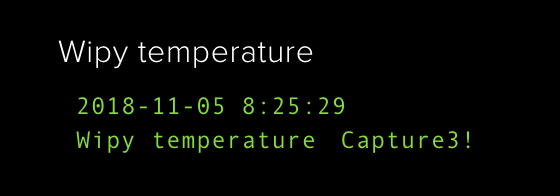

In [22]:
from IPython.display import Image
Image("adafruit_display.png")